<a href="https://colab.research.google.com/github/Abdelrahman-Elnagar/Dimension_Picker/blob/main/Dimension_Picker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of Components: 8
Explained variance ratio:
 [8.39054894e-01 8.69516209e-02 3.23053901e-02 2.07487304e-02
 1.06187080e-02 7.93409586e-03 1.58677048e-03 7.99790556e-04]
Total variance explained for 8 dimensions is: 1.0


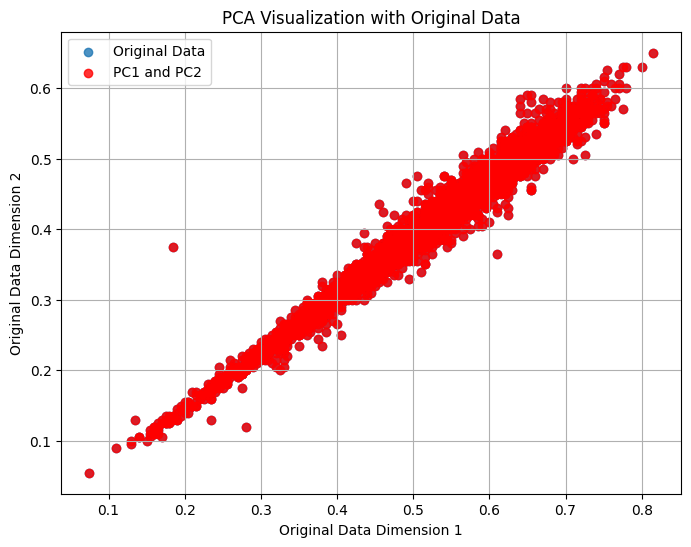

Total number of points changed: 0
---------------------------------------------------------------------
Number of Components: 7
Explained variance ratio:
 [0.83905489 0.08695162 0.03230539 0.02074873 0.01061871 0.0079341
 0.00158677]
Total variance explained for 7 dimensions is: 0.9992002094437769


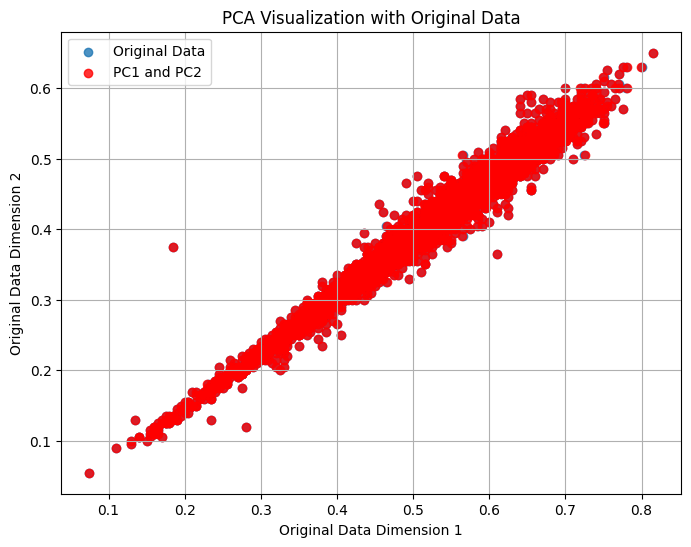

Total number of points changed: 10
---------------------------------------------------------------------
Number of Components: 6
Explained variance ratio:
 [0.83905489 0.08695162 0.03230539 0.02074873 0.01061871 0.0079341 ]
Total variance explained for 6 dimensions is: 0.9976134389627899


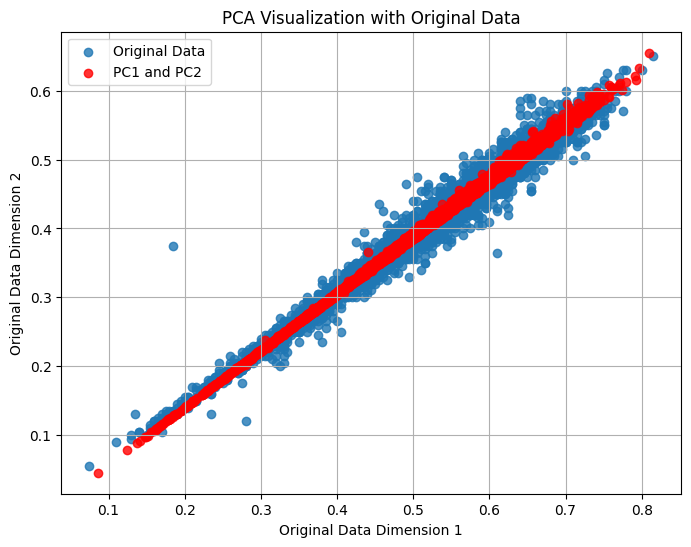

Total number of points changed: 10
---------------------------------------------------------------------
Number of Components: 5
Explained variance ratio:
 [0.83905489 0.08695162 0.03230539 0.02074873 0.01061871]
Total variance explained for 5 dimensions is: 0.9896793431001902


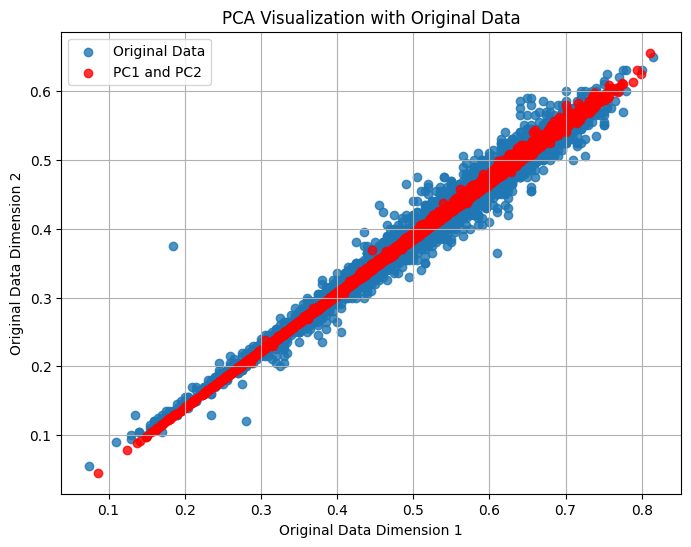

Total number of points changed: 33
---------------------------------------------------------------------
Number of Components: 4
Explained variance ratio:
 [0.83905489 0.08695162 0.03230539 0.02074873]
Total variance explained for 4 dimensions is: 0.9790606351413715


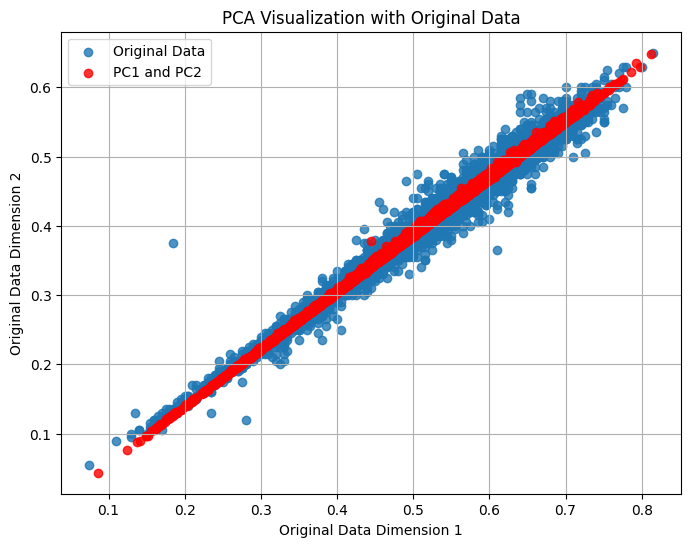

Total number of points changed: 631
---------------------------------------------------------------------
Number of Components: 3
Explained variance ratio:
 [0.83905489 0.08695162 0.03230539]
Total variance explained for 3 dimensions is: 0.9583119047723673


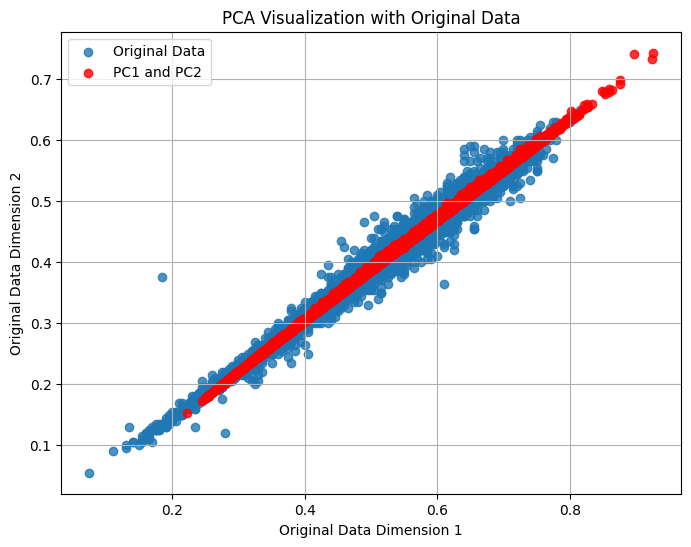

Total number of points changed: 702
---------------------------------------------------------------------
Number of Components: 2
Explained variance ratio:
 [0.83905489 0.08695162]
Total variance explained for 2 dimensions is: 0.9260065147005625


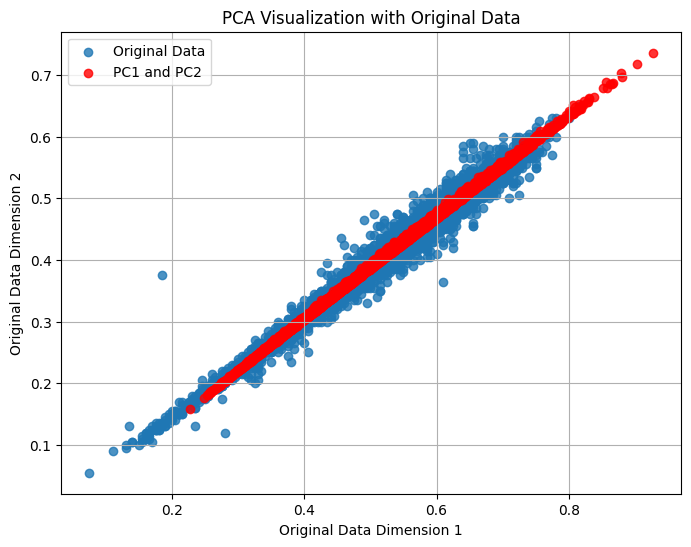

Total number of points changed: 1556
---------------------------------------------------------------------
Number of Components: 8
Explained variance ratio:
 [8.39054894e-01 8.69516209e-02 3.23053901e-02 2.07487304e-02
 1.06187080e-02 7.93409586e-03 1.58677048e-03 7.99790556e-04]
Total variance explained for 8 dimensions is: 1.0
Total number of points changed: 0
---------------------------------------------------------------------
Number of Components: 7
Explained variance ratio:
 [0.83905489 0.08695162 0.03230539 0.02074873 0.01061871 0.0079341
 0.00158677]
Total variance explained for 7 dimensions is: 0.9992002094437769
Total number of points changed: 10
---------------------------------------------------------------------
Number of Components: 6
Explained variance ratio:
 [0.83905489 0.08695162 0.03230539 0.02074873 0.01061871 0.0079341 ]
Total variance explained for 6 dimensions is: 0.9976134389627908
Total number of points changed: 10
----------------------------------------------

In [5]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Initialize empty lists to store values
total_variance_explained_list = []
num_changed_points_list = []

def load_dataset(file_path):
    data = pd.read_csv(file_path)
    return data

def apply_pca(data, num_components):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    pca = PCA(n_components=num_components)
    pca_data = pca.fit_transform(scaled_data)
    explained_variance_ratio = pca.explained_variance_ratio_
    print("Explained variance ratio:\n", explained_variance_ratio)
    total_variance_explained = np.sum(explained_variance_ratio)
    print("Total variance explained for", num_components, "dimensions is:", total_variance_explained)
    if  len(total_variance_explained_list)<7: #to be updated
      total_variance_explained_list.append(total_variance_explained)
    return pca_data, pca, scaler

# Calculate reconstruction error
def calculate_reconstruction_error(original_data, reconstructed_data):
    return np.sqrt(np.mean((original_data - reconstructed_data)**2, axis=1))

# Visualize PCA components on original data
def visualize_pca(pca_data, original_data, pca, scaler):
    pca_restored = pca.inverse_transform(pca_data)
    restored_data = scaler.inverse_transform(pca_restored)
    reconstruction_error = calculate_reconstruction_error(original_data, restored_data)
    plt.figure(figsize=(8, 6))
    plt.scatter(original_data[:, 0], original_data[:, 1], alpha=0.8)
    plt.scatter(restored_data[:, 0], restored_data[:, 1], color='red', alpha=0.8)
    plt.xlabel('Original Data Dimension 1')
    plt.ylabel('Original Data Dimension 2')
    plt.title('PCA Visualization with Original Data')
    plt.legend(['Original Data', 'PC1 and PC2'])
    plt.grid(True)
    plt.show()
    return reconstruction_error

# Example usage
if __name__ == "__main__":
    # Load dataset
    file_path = "/content/abalone.csv"  # Update with your dataset path
    data = load_dataset(file_path)
    # Extract features
    features = data.drop('Sex', axis=1)
    num_attributes = len(features.columns)
    # Iterate over number of components
    for i in range(num_attributes,1,-1):
        print("Number of Components:", i)
        # Apply PCA
        pca_data, pca, scaler = apply_pca(features, i)
        # Visualize PCA components on original data
        visualize_pca(pca_data, features.values, pca, scaler)
        # Calculate reconstruction error
        pca_restored = pca.inverse_transform(pca_data)
        restored_data = scaler.inverse_transform(pca_restored)
        reconstruction_error = calculate_reconstruction_error(features.values, restored_data)
        # Count number of points with non-zero reconstruction error
        num_changed_points = np.sum(reconstruction_error > 1e-1)  # Choose an appropriate threshold
        print("Total number of points changed:", num_changed_points)
        # Append values to lists
        num_changed_points_list.append(num_changed_points)
        print("---------------------------------------------------------------------")
if __name__ == "__main__":
    # Load dataset
    file_path = "/content/abalone.csv"  # Update with your dataset path
    data = load_dataset(file_path)
    # Extract features
    features = data.drop('Sex', axis=1)
    num_attributes = len(features.columns)
    # Iterate over number of components
    for i in range(num_attributes,1,-1):
        print("Number of Components:", i)
        # Apply PCA
        pca_data, pca, scaler = apply_pca(features, i)
        # Calculate reconstruction error
        pca_restored = pca.inverse_transform(pca_data)
        restored_data = scaler.inverse_transform(pca_restored)
        reconstruction_error = calculate_reconstruction_error(features.values, restored_data)
        # Count number of points with non-zero reconstruction error
        num_changed_points = np.sum(reconstruction_error > 1e-1)  # Choose an appropriate threshold
        print("Total number of points changed:", num_changed_points)
        print("---------------------------------------------------------------------")
    print(total_variance_explained_list)
    print(num_changed_points_list)

In [6]:
print(total_variance_explained_list)
print(num_changed_points_list)
result = []
preferred_data_loss = int(input("Enter the preferred number of data loss: "))
preferred_variance = float(input("Enter the preferred varriance: "))

def find_closest_smaller(arr, target):
    closest_smaller_index = None

    for i in range(len(arr)):
        if arr[i] <= target:
            closest_smaller_index = i
        else:
            break

    return closest_smaller_index

def print_indices_smaller_than_target(arr, target):
    closest_smaller_index = find_closest_smaller(arr, target)

    if closest_smaller_index is None:
        print("Target value can't be achieved")
        return

    print("Indices smaller than the index of the closest smaller value {}:".format(arr[closest_smaller_index]))
    for i in range(closest_smaller_index + 1):
        print(8 - i, end=" ")
        result.append(8-i)
    print(' ')

def find_closest_greater(arr, target):
    closest_greater_index = None

    for i in range(len(arr) - 1, -1, -1):
        if arr[i] >= target:
            closest_greater_index = i
            break

    return closest_greater_index

def print_indices_greater_than_target(arr, target):
    closest_greater_index = find_closest_greater(arr, target)
    if closest_greater_index is None:
        print("Target value can't be achieved")
        return
    print("Indices greater than the index of the closest greater value {}:".format(arr[closest_greater_index]))
    for i in range(0,closest_greater_index + 1):
        print(8 - i, end=" ")
        result.append(8-i)
    print('')
def print_repeated_values(arr):
    # Dictionary to store count of each element
    count_dict = {}

    # Count occurrences of each element
    for element in arr:
        count_dict[element] = count_dict.get(element, 0) + 1

    # Print repeated values
    repeated_values = [key for key, value in count_dict.items() if value > 1]
    if repeated_values:
        print("Dimensions you can pick:", repeated_values)
    else:
        print("No dimension can satisfy your requirements")

print_indices_smaller_than_target(num_changed_points_list, preferred_data_loss)
print_indices_greater_than_target(total_variance_explained_list, preferred_variance)
print_repeated_values(result)


[1.0, 0.9992002094437769, 0.9976134389627899, 0.9896793431001902, 0.9790606351413715, 0.9583119047723673, 0.9260065147005625]
[0, 10, 10, 33, 631, 702, 1556]
Enter the preferred number of data loss: 702
Enter the preferred varriance: 0.99
Indices smaller than the index of the closest smaller value 702:
8 7 6 5 4 3  
Indices greater than the index of the closest greater value 0.9976134389627899:
8 7 6 
Dimensions you can pick: [8, 7, 6]
